לצורך נוחות טבלה של הייצוגים של האותיות והסימנים
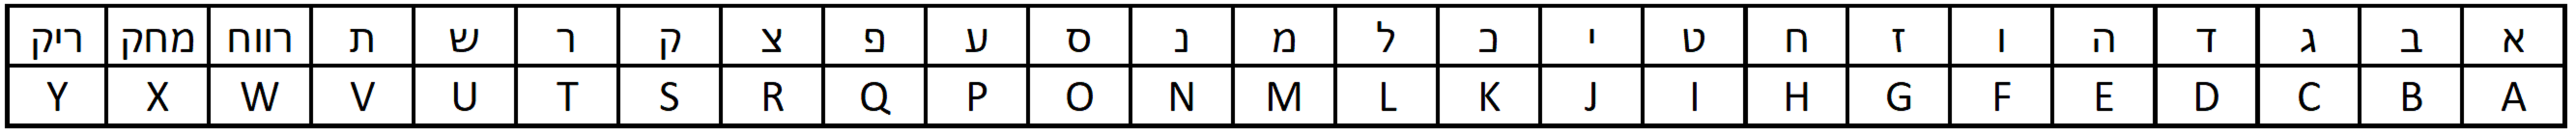

טעינת ספריות:
1. numpy 
2. os
3. tensorflow
4. pyplot 
5. random 
6. cv2 (openCV) - ספרייה המאפשרת לבצע פעולות על תמונות בקלות, להעביר למערך, לגווי שחור לבן וכו


In [ ]:
import numpy as np
import os
import tensorflow as tf
from  matplotlib import pyplot as plt
import random
import cv2

%matplotlib inline

Driveחילוץ התמונות מהתיקייה ב

In [ ]:
!unzip "/content/drive/MyDrive/Project_ISL/DataSet.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: DataSet/Y/Y_1901.png    
  inflating: DataSet/Y/Y_1902.png    
  inflating: DataSet/Y/Y_1903.png    
  inflating: DataSet/Y/Y_1904.png    
  inflating: DataSet/Y/Y_1905.png    
  inflating: DataSet/Y/Y_1906.png    
  inflating: DataSet/Y/Y_1907.png    
  inflating: DataSet/Y/Y_1908.png    
  inflating: DataSet/Y/Y_1909.png    
  inflating: DataSet/Y/Y_191.png     
  inflating: DataSet/Y/Y_1910.png    
  inflating: DataSet/Y/Y_1911.png    
  inflating: DataSet/Y/Y_1912.png    
  inflating: DataSet/Y/Y_1913.png    
  inflating: DataSet/Y/Y_1914.png    
  inflating: DataSet/Y/Y_1915.png    
  inflating: DataSet/Y/Y_1916.png    
  inflating: DataSet/Y/Y_1917.png    
  inflating: DataSet/Y/Y_1918.png    
  inflating: DataSet/Y/Y_1919.png    
  inflating: DataSet/Y/Y_192.png     
  inflating: DataSet/Y/Y_1920.png    
  inflating: DataSet/Y/Y_1921.png    
  inflating: DataSet/Y/Y_1922.png    
  inflating: DataSet/Y/Y_1923.png    

In [ ]:
img_folder = os.path.join("/content/DataSet") #תקיית התמונות

# פרק א - נתונים


<div dir=rtl>
ה- DataSet נבנה על ידי סטודנטים באורט ברמודה </p>
ה-DataSet היה מחולק לתקיות של Train Test ו- Val ובכל תקייה ישנם תיקיות של לפי הקטגוריות</p>
לאחר שהורדתי את התמונות למחשב, סידרתי כך שלא יהיה מחולק ל Train Test ו- Val אלה רק לפי הקטגוריות


נכתוב פעולה המקבלת תקייה ומציגה בגרף כמה קבצים יש מכל קטגוריה

In [ ]:
def countImg(folder, title = "DataSet"):
  #פעולה המקבלת מיקום של תקייה ובה תיקיות של קטגוריות ומציגה בגרף כמה קבצים יש מכל קטגוריה
  lst = os.listdir(folder) 
  lst.sort()
  plt.figure(figsize=(10, 3))
  plt.xlabel("Category")
  plt.ylabel("Num of images")
  plt.title(title)
  for dir in lst:
    counter = len(os.listdir(os.path.join(folder, dir)))
    plt.bar(dir, counter, width = 0.3)
  plt.show()

Datasetנשתמש בפעולה על מנת להציג מספר התמונות ב

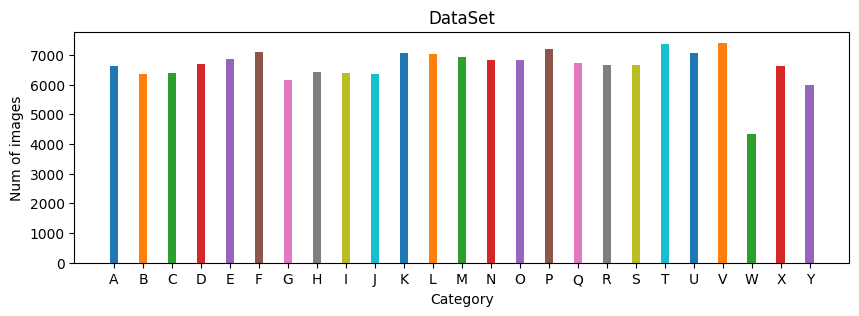

In [ ]:
countImg(img_folder)

ניתן לראות שהנתונים יחסית מאוזנים

נבנה פעולה שתציג לנו תמונה רנדומלית מכל קטגוריה

In [ ]:
def display_img(img_folder):
  #פעולה המקבלת מיקום של תקייה המכילה תיקיות מקטגוריות שונות ובוחרת מכל קטגוריה תמונה רנדומלית ומציגה אותה 
  plt.figure(figsize=(14,14), tight_layout=True)  
  i = 0
  l = os.listdir(img_folder)
  l.sort()
  for dir1 in l:
    if len(os.listdir(os.path.join(img_folder, dir1))) != 0:
      i+=1
      file = random.choice(os.listdir(os.path.join(img_folder, dir1)) ) #בחירה רנדומלית של תמונה
      image_path= os.path.join(img_folder, dir1, file)
      img=cv2.imread(image_path)
      print(file)
      ax=plt.subplot(5,5,i)
      ax.title.set_text(file)
      plt.imshow(img)

A1010.jpg
B_1072_flipped.png
C_1536_flipped.png
D883.jpg
E_2144_flipped.png
F_429.png
G_1047_flipped.png
H_9.png
I_634.png
J_142_flipped.png
K_2297.png
L918_flipped.jpg
M_2074_flipped.png
N_700_flipped.png
O_1378_flipped.png
P_341_flipped.png
Q704.jpg
R_1791.png
S321.jpg
T942_flipped.jpg
U543.jpg
V356_flipped.jpg
W_1461.png
X_2173_flipped.png
Y_469.png


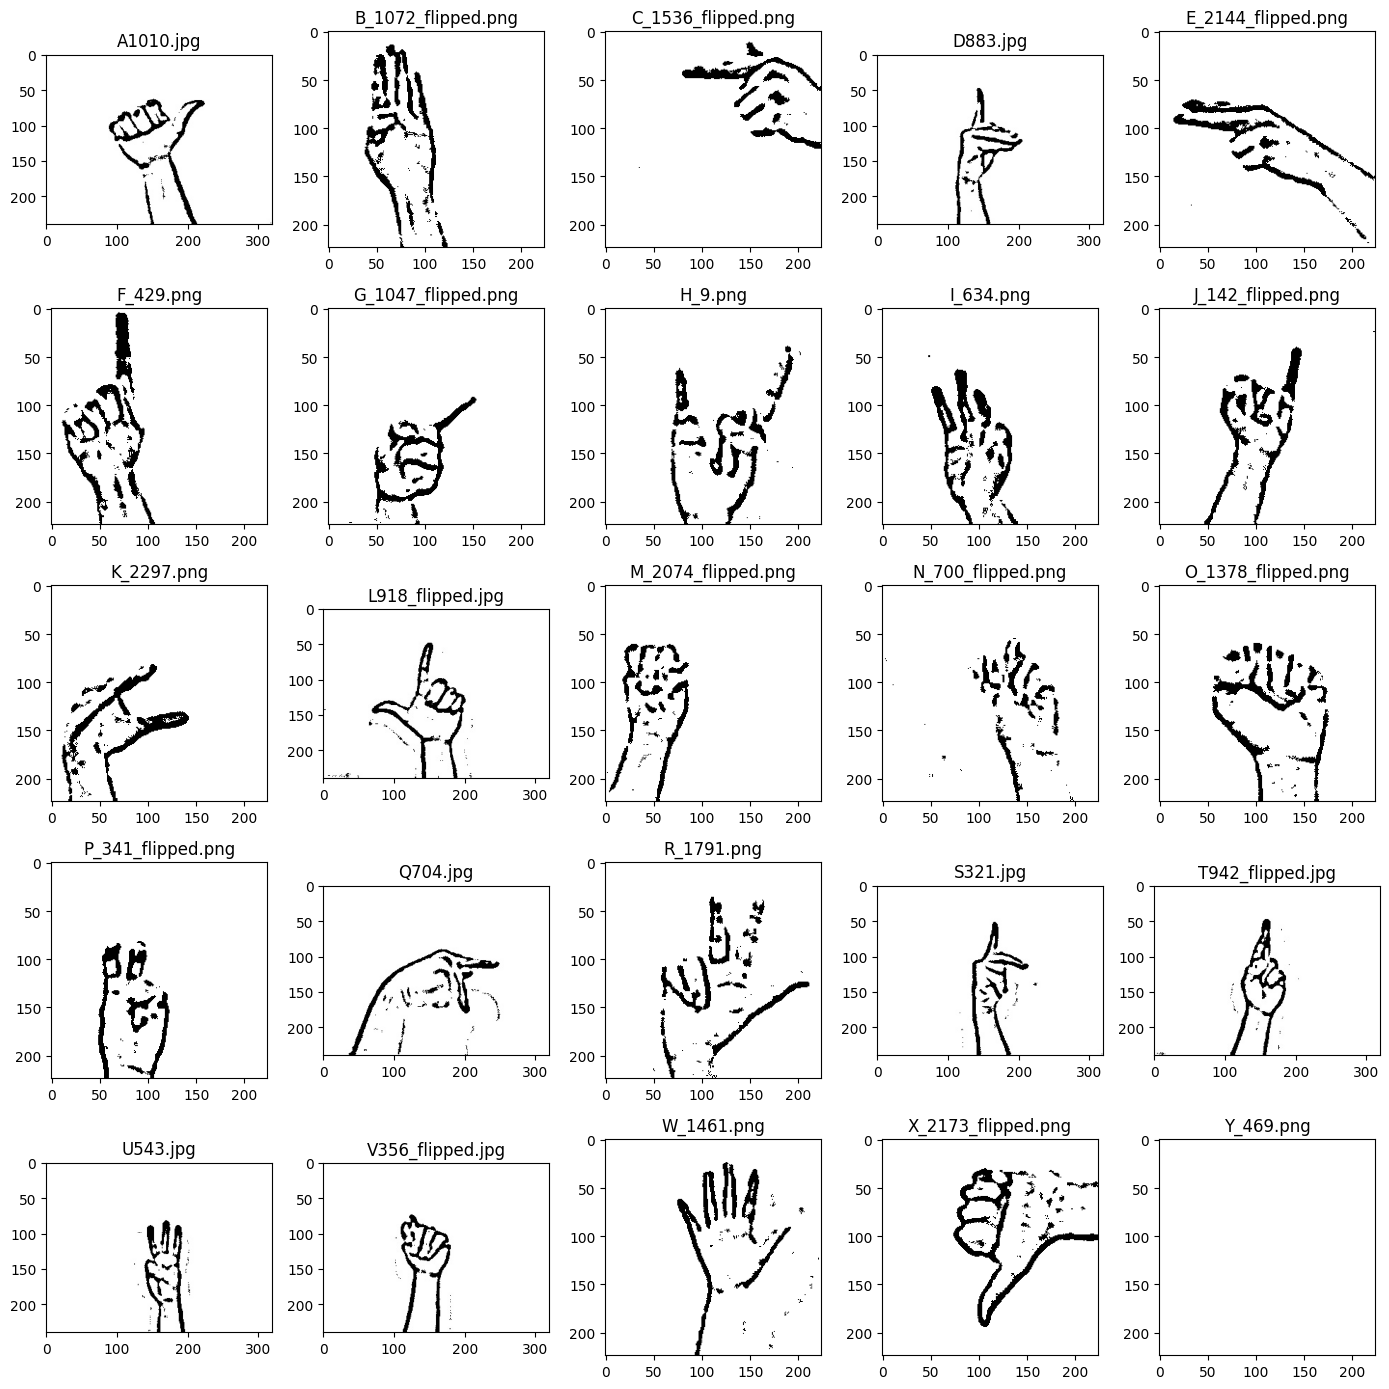

In [ ]:
display_img(img_folder)

 Split folders נוריד את הספרייה
 
 :הספרייה מקבלת תקייה של נתונים המחולקים באופן הבא


```
DataSet:
  class1:
    ...
  class2:
    ...
  ..

```
:ויוצרת תקייה חדשה המחלקת את הנתונים באופן הבא

```
train:
  class1:
    ...
  class2:
    ...
  ..
val:
  class1:
    ...
  class2:
    ...
  ..
test:
  class1:
    ...
  class2:
    ...
  ..

```
היחס בין התקיות נקבע על פי פרמטר
הפעולה מבטיחה שיהיה ערבוב בין התמונות וללא חזרות


In [ ]:
!pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio(img_folder, ratio=(.8, .1, .1), seed = 1337)

Copying files: 166130 files [00:26, 6173.18 files/s]


נבדוק כמה תמונות יש בכל קטגוריה אחרי החלוקה

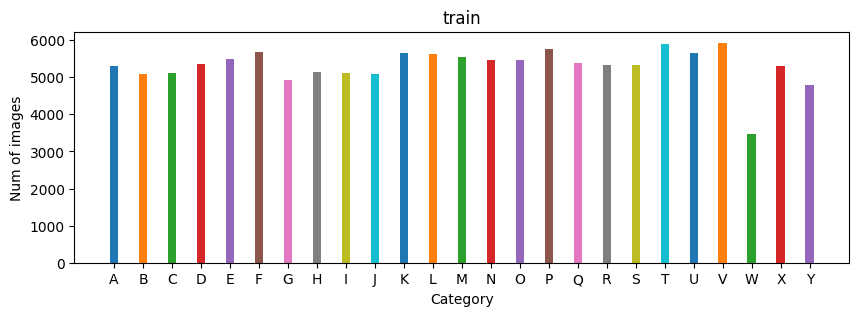

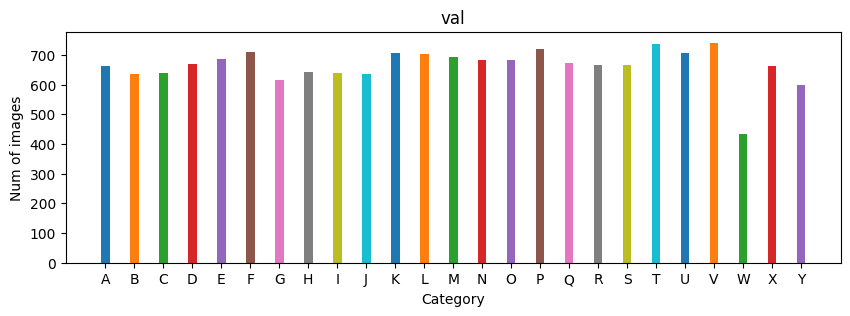

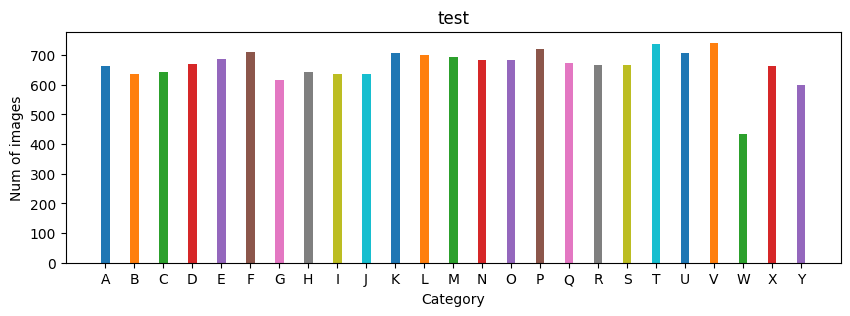

In [ ]:
countImg("/content/output/train", "train")
countImg("/content/output/val", "val")
countImg("/content/output/test", "test")

נגדיר משתנים קבועים:

nbatch - גודל Batch
imgDim - גודל התמונות 
classes - קטגוריות

In [ ]:
nbatch = 128
imgDim = 128 
classes= 'A B C D E F G H I J K L M N O P Q R S T U V W X Y'.split()

# פרק ב - אימון מודל ראשון

<div dir=rtl>
  בפרק זה אשחזר את המודל שבוצע במאמר CNN בעל 12 שכבות במטרה לשחזר את הישגי המודל </p>
  על פי כותבי המאמר, הם בחרו במודל זה כי לאחר מספר הרצות עם מודלים נוספים המודל הביא לביצועים הטובים ביותר, אך לא מצוין אילו מודלים נוספים נבדקו.

**מבנה המודל**
<div dir=rtl>
:המודל מורכב מ"בלוק" שחוזר על עצמו 12 פעמים, וכל בלוק בנוי בצורה הבאה


1.   שכבת קונבולציה עם פילטר בגודל 3X3
2.   הוספת Padding בגודל 1X1
3.   שכבת batch norm
4.   פונקצית אקטיבציה PRelu

בכל בלוק שני נוספת עוד שכבה:

5. שכבת Max Pooling בגודל 2X2

במאמר הציגו את מבנה המודל כך:
</div>

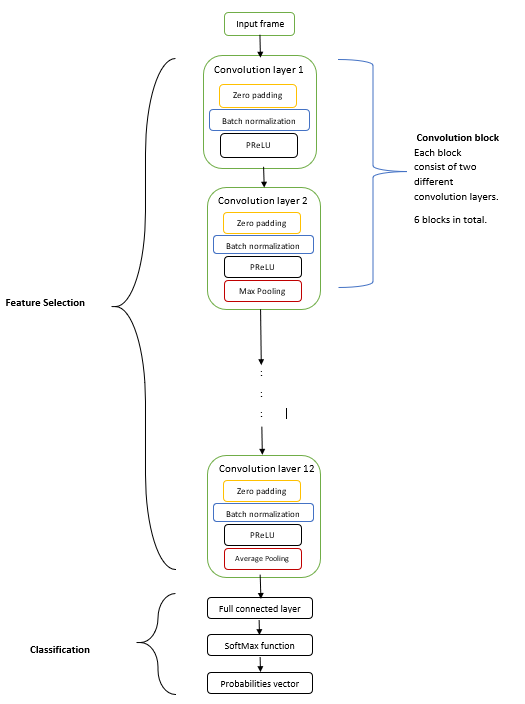


flow_from_directory וגם ImageDataGenerator נטען את התמונות על ידי

הטעינה כוללת חלוקה ב-255 בכדי לבצע נרמול


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1. / 255.) # נרמול התמנות

train = train.flow_from_directory( "/content/output/train", # תיקיית האימון
    class_mode='categorical', 
    classes= classes,
    color_mode='grayscale', # נטען את התמונות בשחור לבן מכיוון שאין צורך בצבע
    target_size=(imgDim, imgDim), # נשנה את גודל התמונה
    batch_size = nbatch, # נגדיר Batch Size
    shuffle = True     # נערבב את התמונות
)

Found 132893 images belonging to 25 classes.


In [ ]:
val = ImageDataGenerator(rescale=1. / 255.)

val = val.flow_from_directory("/content/output/val",
                              target_size=(imgDim, imgDim),
                              color_mode='grayscale',
                              batch_size=nbatch,
                              classes=classes,
                              class_mode="categorical", 
                              shuffle = True)

Found 16603 images belonging to 25 classes.


In [ ]:
test = ImageDataGenerator(rescale=1. / 255.)

test = test.flow_from_directory("/content/output/test",
                              target_size=(imgDim, imgDim),
                              color_mode='grayscale',
                              batch_size=nbatch,
                              classes=classes,
                              class_mode="categorical",
                              shuffle = False)

Found 16634 images belonging to 25 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.layers import PReLU
from keras.layers.convolutional import ZeroPadding2D
from keras.layers import BatchNormalization
from keras.layers.pooling import AveragePooling2D
from keras.models import Sequential
from keras import optimizers 


#משתנים מוגדרים
learnRate = 0.01
def getModel(weightsPath=None):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(imgDim, imgDim, 1))) # שכבת קונבולוציה
    model.add(ZeroPadding2D(padding=(1, 1))) #Padding
    model.add(BatchNormalization()) #Batch Normalization
    model.add(PReLU()) #PRelu

    model.add(Conv2D(32, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(64, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(128, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(256, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(512, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Conv2D(1028, (3, 3)))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    # Dense = Fully connected layer
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(classes), activation='softmax'))

    # opt = SGD(lr=learnRate, decay=1e-6, momentum=0.9, nesterov=True)
    opt = optimizers.Adam(learning_rate=learnRate)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


    return model

In [ ]:
model1 = getModel()

נציג את תוכן המודל בטבלה:

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 zero_padding2d (ZeroPadding  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 p_re_lu (PReLU)             (None, 128, 128, 32)      524288    
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 128, 128, 32)     0

במודל יש 29,517,105 פרמטרים ומתוכם 29,509,025 ניתנים לאימון בעוד 8,080 לא ניתנים לאימון

ובגרף:

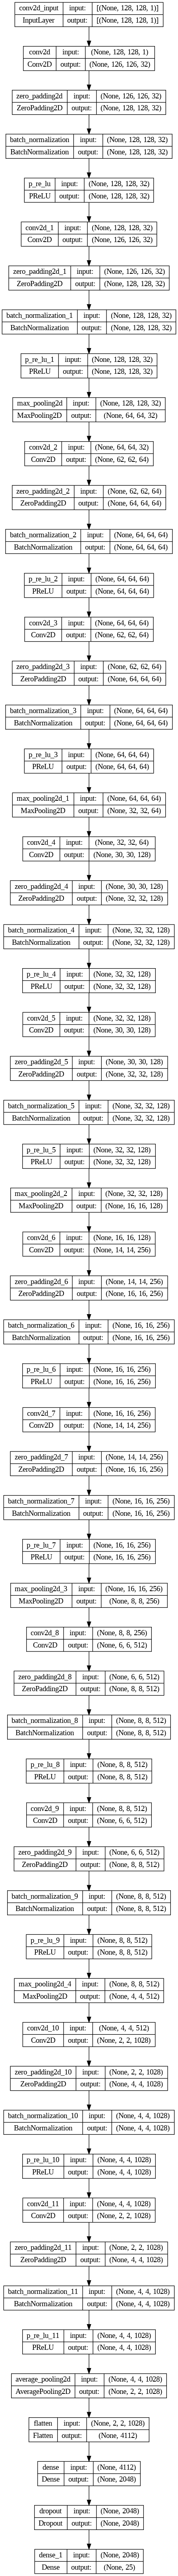

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

נאמן את המודל 50 פעמים, כמו במאמר המקורי

In [ ]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(patience= 10, start_from_epoch = 10), #עצירה מוקדמת על מנת למנוע OverFiting ואימון מיותר
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Project_ISL/Model1_CNN12', monitor='val_loss'), #שמירת המודל לאחר כל Epoch שיהיה אפשר לשחזר במקרה של קריסה
    tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/Project_ISL/log.csv',separator=",", append = True ) #csv שומר את היסטוריית המודל לקובץ
] 
step_size_train = train.n // train.batch_size 
step_size_val = val.n // val.batch_size

history1 = model1.fit(train, epochs = 50,validation_data=val, callbacks = callbacks_list,  
                      steps_per_epoch =  step_size_train, 
                      validation_steps=step_size_val)
model1.save("/content/drive/MyDrive/Project_ISL/modle1_CNN12_1.h5")

Epoch 1/50
1038/1038 [==============================] - ETA: 0s - loss: 2.4418 - accuracy: 0.3571

1038/1038 [==============================] - 492s 456ms/step - loss: 2.4418 - accuracy: 0.3571 - val_loss: 5.5142 - val_accuracy: 0.2519
Epoch 2/50
1038/1038 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9128

1038/1038 [==============================] - 473s 455ms/step - loss: 0.2748 - accuracy: 0.9128 - val_loss: 0.8229 - val_accuracy: 0.8355
Epoch 3/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 0.9747

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0913 - accuracy: 0.9747 - val_loss: 4.7837 - val_accuracy: 0.4174
Epoch 4/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9825

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0679 - accuracy: 0.9825 - val_loss: 0.0636 - val_accuracy: 0.9868
Epoch 5/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9881

1038/1038 [==============================] - 472s 454ms/step - loss: 0.0495 - accuracy: 0.9881 - val_loss: 0.5271 - val_accuracy: 0.9121
Epoch 6/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9875

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0562 - accuracy: 0.9875 - val_loss: 0.1998 - val_accuracy: 0.9637
Epoch 7/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9876

1038/1038 [==============================] - 472s 455ms/step - loss: 0.0593 - accuracy: 0.9876 - val_loss: 1.1480 - val_accuracy: 0.8573
Epoch 8/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9919

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0399 - accuracy: 0.9919 - val_loss: 0.8274 - val_accuracy: 0.9182
Epoch 9/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9911

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0487 - accuracy: 0.9911 - val_loss: 1.8381 - val_accuracy: 0.8355
Epoch 10/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9938

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0338 - accuracy: 0.9938 - val_loss: 0.1274 - val_accuracy: 0.9793
Epoch 11/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9904

1038/1038 [==============================] - 474s 457ms/step - loss: 0.0599 - accuracy: 0.9904 - val_loss: 4.8059 - val_accuracy: 0.7026
Epoch 12/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9939

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0388 - accuracy: 0.9939 - val_loss: 1.5752 - val_accuracy: 0.8330
Epoch 13/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9897

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0624 - accuracy: 0.9897 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 14/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9948

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0363 - accuracy: 0.9948 - val_loss: 4.7186 - val_accuracy: 0.5702
Epoch 15/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9925

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0512 - accuracy: 0.9925 - val_loss: 0.0311 - val_accuracy: 0.9957
Epoch 16/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9939

1038/1038 [==============================] - 472s 455ms/step - loss: 0.0391 - accuracy: 0.9939 - val_loss: 0.9306 - val_accuracy: 0.9359
Epoch 17/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9935

1038/1038 [==============================] - 471s 454ms/step - loss: 0.0459 - accuracy: 0.9935 - val_loss: 6.4560 - val_accuracy: 0.7184
Epoch 18/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9933

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0529 - accuracy: 0.9933 - val_loss: 0.0759 - val_accuracy: 0.9872
Epoch 19/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9967

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0260 - accuracy: 0.9967 - val_loss: 0.6885 - val_accuracy: 0.9668
Epoch 20/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9928

1038/1038 [==============================] - 473s 455ms/step - loss: 0.0580 - accuracy: 0.9928 - val_loss: 0.8869 - val_accuracy: 0.8836
Epoch 21/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9929

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0538 - accuracy: 0.9929 - val_loss: 2.1331 - val_accuracy: 0.9297
Epoch 22/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9959

1038/1038 [==============================] - 474s 456ms/step - loss: 0.0315 - accuracy: 0.9959 - val_loss: 0.5210 - val_accuracy: 0.9809
Epoch 23/50
1038/1038 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9919

1038/1038 [==============================] - 473s 456ms/step - loss: 0.0674 - accuracy: 0.9919 - val_loss: 0.2122 - val_accuracy: 0.9849


נציג את תוצאות המודל

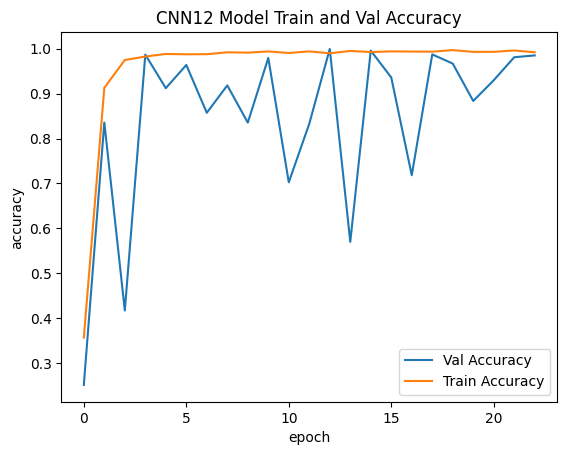

<function matplotlib.pyplot.show(close=None, block=None)>

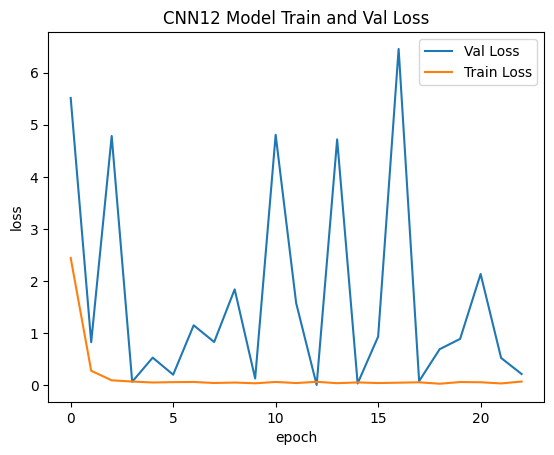

In [ ]:
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.title('CNN12 Model Train and Val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(history1.history['val_loss'], label='Val Loss')
plt.plot(history1.history['loss'], label='Train Loss')
plt.title('CNN12 Model Train and Val Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

<div dir=rtl>
ניתן לראות כי המודל הגיע אחוזי הצלחה וזיהוי גבוהים  וגם אחוזי שגיאה נמוכים בValidation ובTrain. אומנם היו "קפיצות" ל-Validation אבל לבסוף הגיע לאחוזים דומים לשל הTrain.

In [ ]:
from tensorflow import keras

model1 = keras.models.load_model('/content/drive/MyDrive/Project_ISL/modle1_CNN12.h5') # טעינת המודל

<div dir=rtl>
נכין Confution Matrix על ידי ספריית sklearn <p>
ספרייה זו מאפשרת ניתוח נתונים באופן פשוט בשימוש עם mathplitlib, numpy ו- SciPy

<div dir= rtl>
נבצע predict לTrain

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay 

preds1 = model1.predict(test) 

true_categories = test.labels

130/130 [==============================] - 22s 168ms/step


 <div dir=rtl>
 נבדוק כמה אחוזי הצלחה יש למודל על ידי השוואה בין החיזוי של המודל לעומת הקטגוריה האמיתית עם הפעולה accuracy_score

In [ ]:
print("accuracy score: "+"%.2f" % (accuracy_score(true_categories, preds1.argmax(axis=1))*100) + "%")

accuracy score: 98.50%


הגענו לאחוזי הצלחה של 98.5% התואמים לאלה שבמאמר

<div dir=rtl>
נציג confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix model #1')

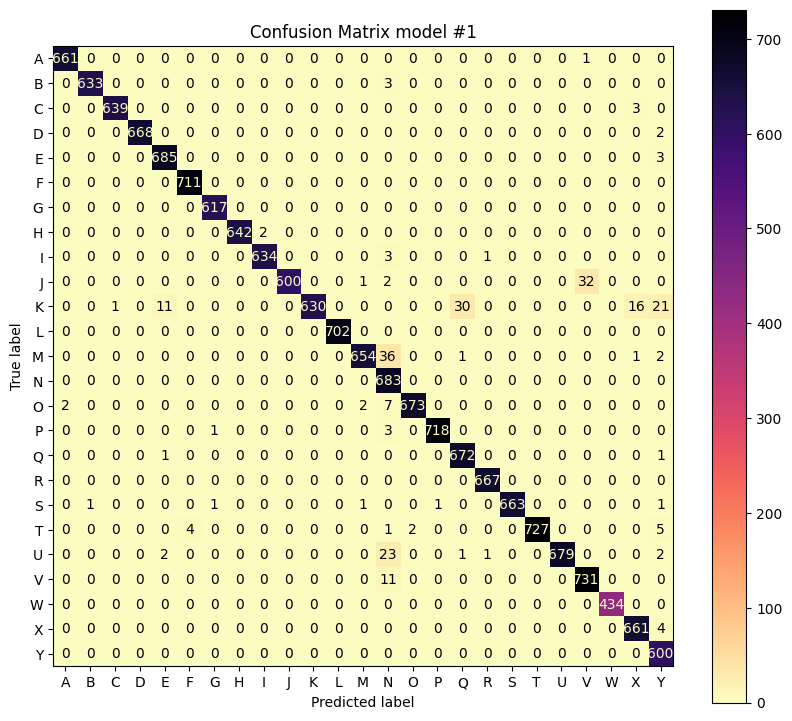

In [ ]:
from sklearn.metrics import confusion_matrix
true_categories = np.array(true_categories)
_, ax = plt.subplots(figsize=(10,9 ))
disp = ConfusionMatrixDisplay.from_predictions(y_true= true_categories, y_pred = preds1.argmax(axis =1), cmap = "magma_r", display_labels = classes, ax = ax)
plt.title("Confusion Matrix model #1")


<div dir = rtl> 
התקבל confusion matrix עם מעט מאוד שגיאות התואמים לאחוזי ההצלחה והזיהוי

# הצגת מודל מתחרה


.Inception לאחר חיפוש באינטרנט החלטתי לאמן את המודל

[החקר שנערך על מנת למצוא מודל](https://docs.google.com/document/d/1CHiDfJG85DVrT0et8JaOKkDm6UxZ5hUTSZj0B_WB7cI/edit?usp=sharing)


<div dir=rtl>
נטען את התמונות מחדש, רק  שההבדל הפעם הוא שהתמונות צבעוניות כי המודל Inception לא מקבל תמונות בשחור לבן

In [ ]:
train = ImageDataGenerator(rescale=1. / 255.,)

train = train.flow_from_directory( "/content/output/train",
                                  class_mode='categorical',
                                  classes= classes,
                                  color_mode='rgb',
                                  target_size=(imgDim, imgDim),
                                  batch_size = nbatch,
                                  shuffle = True,
                                  seed = 2235     
)

Found 132893 images belonging to 25 classes.


In [ ]:
val = ImageDataGenerator(rescale=1. / 255.)

val = val.flow_from_directory("/content/output/val",
                              target_size=(imgDim, imgDim),
                              color_mode='rgb',
                              batch_size=nbatch,
                              classes=classes,
                              class_mode="categorical", 
                              shuffle = True,
                              seed = 2235)

Found 16603 images belonging to 25 classes.


In [ ]:
test = ImageDataGenerator(rescale=1. / 255.)

test = test.flow_from_directory("/content/output/test",
                                target_size=(imgDim, imgDim),
                                color_mode='rgb',
                                batch_size=nbatch,
                                classes=classes,
                                class_mode="categorical",
                                shuffle = False)

Found 16634 images belonging to 25 classes.


<div dir =rtl>
נטען את המודל מתוך tensorflow עם המשקלות של imagenet

In [ ]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',include_top=False,input_shape=(imgDim,imgDim,3))

87910968/87910968 [==============================] - 0s 0us/step


<div dir = rtl>
נבנה את המודל עם הוספת שכבות של Flatten, DropOut ו- Softmax

In [ ]:
def model2():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(25,activation='softmax'))
    return model

In [ ]:
model2 = model2()

נציג את מבנה המודל בטבלה

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 25)                204825    
                                                                 
Total params: 22,007,609
Trainable params: 204,825
Non-trainable params: 21,802,784
_________________________________________________________________


ובגרף

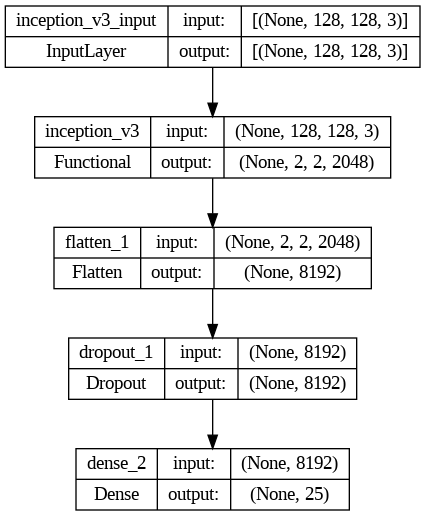

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

נאמן את המודל 20 פעמים

In [ ]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(patience= 5, start_from_epoch = 5), #עצירה מוקדמת על מנת למנוע OverFiting ואימון מיותר
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Project_ISL/modle2_inception1', monitor='val_loss'), #שמירת המודל לאחר כל Epoch שיהיה אפשר לשחזר במקרה של קריסה
    tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/Project_ISL/log_inception.csv',separator=",", append = True) #csv שומר את היסטוריית המודל לקובץ
]
step_size_train = train.n // train.batch_size 
step_size_val = val.n // val.batch_size

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history2 = model2.fit(train, epochs = 20, validation_data= val, callbacks = callbacks_list,
                      steps_per_epoch =  step_size_train, 
                      validation_steps=step_size_val)
model2.save("/content/drive/MyDrive/Project_ISL/modle2_inception1.h5")

Epoch 1/20
1038/1038 [==============================] - ETA: 0s - loss: 0.2241 - accuracy: 0.9315

1038/1038 [==============================] - 200s 189ms/step - loss: 0.2241 - accuracy: 0.9315 - val_loss: 0.1149 - val_accuracy: 0.9648
Epoch 2/20
1038/1038 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9631

1038/1038 [==============================] - 191s 184ms/step - loss: 0.1236 - accuracy: 0.9631 - val_loss: 0.1424 - val_accuracy: 0.9617
Epoch 3/20
1038/1038 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9673

1038/1038 [==============================] - 195s 187ms/step - loss: 0.1155 - accuracy: 0.9673 - val_loss: 0.0774 - val_accuracy: 0.9791
Epoch 4/20
1038/1038 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9705

1038/1038 [==============================] - 198s 191ms/step - loss: 0.1101 - accuracy: 0.9705 - val_loss: 0.0894 - val_accuracy: 0.9776
Epoch 5/20
1038/1038 [==============================] - ETA: 0s - loss: 0.1049 - accuracy: 0.9724

1038/1038 [==============================] - 195s 188ms/step - loss: 0.1049 - accuracy: 0.9724 - val_loss: 0.0879 - val_accuracy: 0.9790
Epoch 6/20
1038/1038 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9747

1038/1038 [==============================] - 192s 185ms/step - loss: 0.1018 - accuracy: 0.9747 - val_loss: 0.0959 - val_accuracy: 0.9792
Epoch 7/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9761

1038/1038 [==============================] - 201s 193ms/step - loss: 0.0963 - accuracy: 0.9761 - val_loss: 0.1093 - val_accuracy: 0.9792
Epoch 8/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9780

1038/1038 [==============================] - 192s 185ms/step - loss: 0.0926 - accuracy: 0.9780 - val_loss: 0.0945 - val_accuracy: 0.9816
Epoch 9/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9780

1038/1038 [==============================] - 191s 184ms/step - loss: 0.0949 - accuracy: 0.9780 - val_loss: 0.1114 - val_accuracy: 0.9799
Epoch 10/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 0.9792

1038/1038 [==============================] - 196s 189ms/step - loss: 0.0914 - accuracy: 0.9792 - val_loss: 0.0883 - val_accuracy: 0.9844
Epoch 11/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9805

1038/1038 [==============================] - 198s 190ms/step - loss: 0.0897 - accuracy: 0.9805 - val_loss: 0.0936 - val_accuracy: 0.9821
Epoch 12/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9804

1038/1038 [==============================] - 197s 189ms/step - loss: 0.0904 - accuracy: 0.9804 - val_loss: 0.0920 - val_accuracy: 0.9847
Epoch 13/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9824

1038/1038 [==============================] - 187s 180ms/step - loss: 0.0810 - accuracy: 0.9824 - val_loss: 0.1256 - val_accuracy: 0.9777
Epoch 14/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9814

1038/1038 [==============================] - 194s 187ms/step - loss: 0.0884 - accuracy: 0.9814 - val_loss: 0.1008 - val_accuracy: 0.9815
Epoch 15/20
1038/1038 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9827

1038/1038 [==============================] - 190s 183ms/step - loss: 0.0845 - accuracy: 0.9827 - val_loss: 0.1134 - val_accuracy: 0.9821


נציג את השיגי המודל

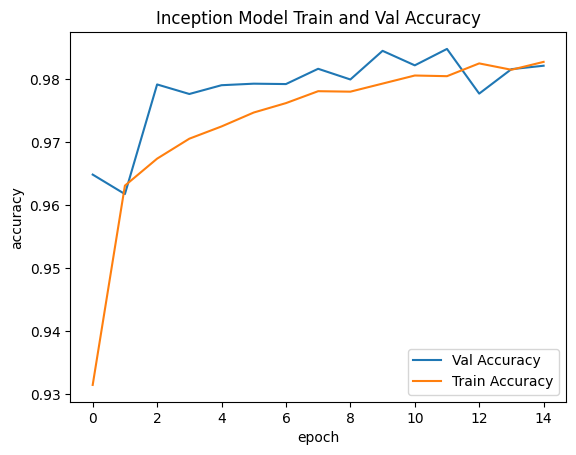

<function matplotlib.pyplot.show(close=None, block=None)>

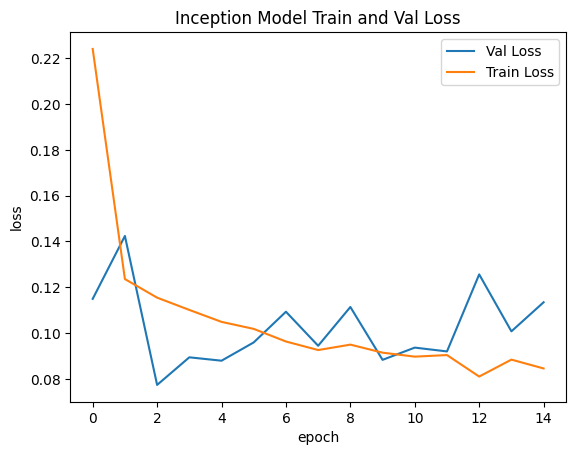

In [ ]:
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.title('Inception Model Train and Val Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(history2.history['val_loss'], label='Val Loss')
plt.plot(history2.history['loss'], label='Train Loss')
plt.title('Inception Model Train and Val Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

In [ ]:
from tensorflow import keras
model2 =  keras.models.load_model("/content/drive/MyDrive/Project_ISL/modle2_inception.h5")

<div dir=rtl>
נציג confution matrix ואחוזי הצלחה

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay 
preds2 = model2.predict(test).round() 
true_categories = test.labels

130/130 [==============================] - 21s 151ms/step


In [ ]:
print("accuracy score: "+"%.2f" % (accuracy_score(true_categories, preds2.argmax(axis=1))*100) + "%")

accuracy score: 98.12%


הגענו לאחוזי הצלחה של 98.12% הקרובים לאחוזי הצלחה של המודל הראשון

Text(0.5, 1.0, 'Confusion Matrix model #1')

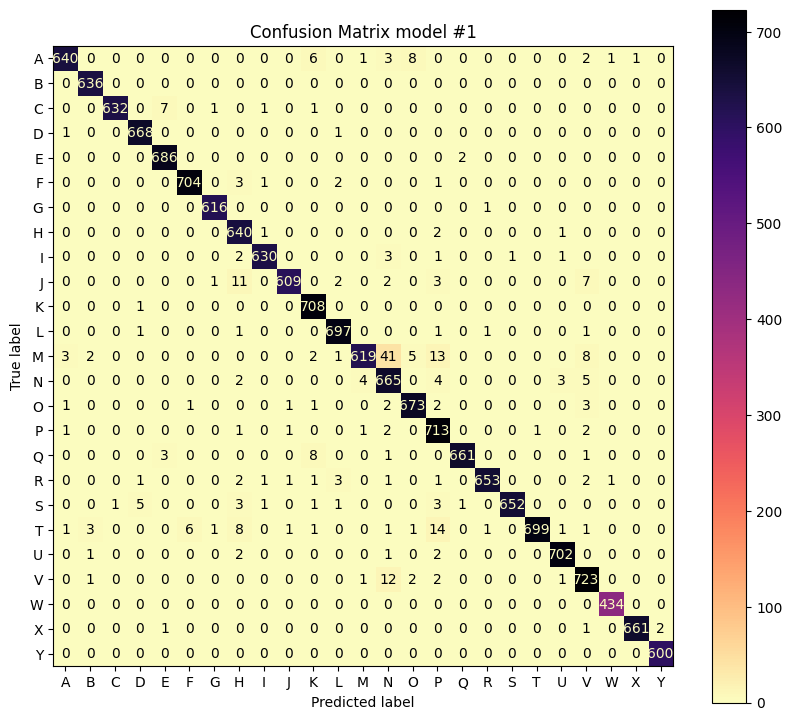

In [ ]:
from sklearn.metrics import confusion_matrix
true_categories = np.array(true_categories)
_, ax = plt.subplots(figsize=(10,9 ))
disp = ConfusionMatrixDisplay.from_predictions(y_true= true_categories, y_pred = preds2.argmax(axis =1), cmap = "magma_r", display_labels = classes, ax = ax)
plt.title("Confusion Matrix model #1")

<div dir = rtl>
התקבל confution matrix עם מעט שגיאות המעידים על התאמה עם אחוזי ההצלחה 

# סיכום ומסקנות

<div dir=rtl><p>
בפרוייקט הצגתי מודל שהגיע לאחוזי הצלחה של 98.5% ללא Transfer Learning לכן בניתי מודל שהשתמש ב Transfer Learning עם המודל Inception <p>
הישגי המודלים היו כמעט זהים לחלוטין כאשר המודל הראשון הגיע ל98.5% זיהוי והמודל השני ל98.12% זיהוי<p>
אומנם המודל הראשון הגיע להישגים להישגים טיפה יותר גבוהים אך התאמן הרבה יותר - 23 לעומת 15.
ההבדלים בין אחוזי ההצלחה של המודלים לא משמעותיים בשביל שהדבר ידרוש לאמן את המודל יתר פעמים <p>
אני חושב שאם רוצים לבצע את הפרוייקט שוב צריך לדאוג שמספר הפעמים שהמודלים מתאמנים יהיה כמעט אותו דבר על מנת שנבטיח שהמודלים הגיעו לאחוזי ההצלחה הגבוהים ביותר
 